In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz

/kaggle/input/irisdecision/Iris.csv


In [2]:
df = pd.read_csv('/kaggle/input/irisdecision/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


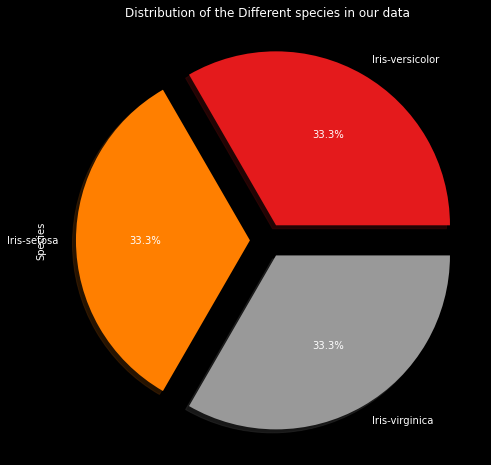

In [4]:
plt.style.use('dark_background') 
plt.figure(figsize = (15,8))
df['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,cmap='Set1')
plt.title('Distribution of the Different species in our data')
plt.show()

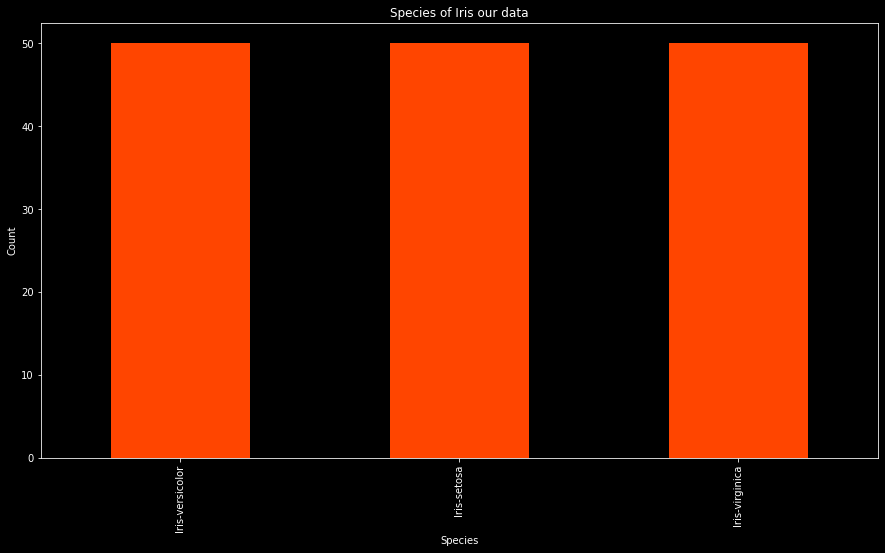

In [5]:
plt.style.use('dark_background') 
plt.figure(figsize = (15,8))
df['Species'].value_counts().plot.bar(color = 'orangered')
plt.title('Species of Iris our data')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

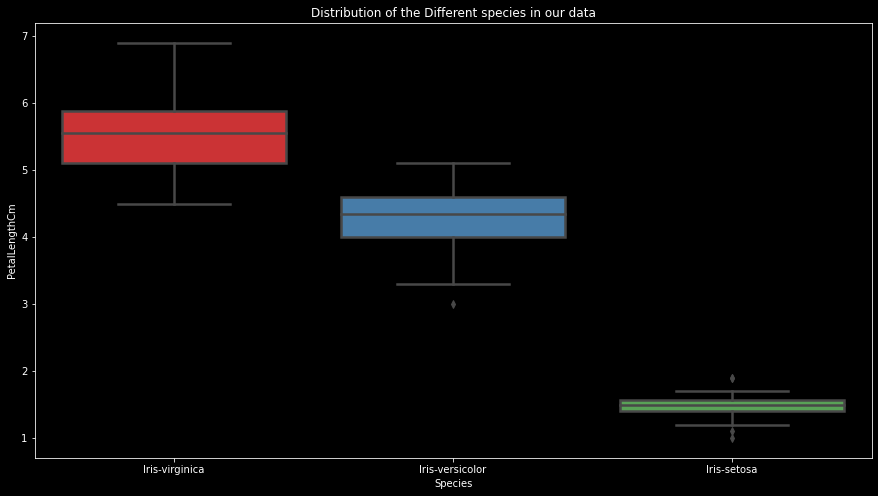

In [6]:
plt.style.use('dark_background') 
plt.figure(figsize = (15,8))
sns.boxplot(x='Species',y='PetalLengthCm',data=df,order=['Iris-virginica','Iris-versicolor','Iris-setosa'],linewidth=2.5,orient='v',dodge=False,palette = 'Set1')
plt.title('Distribution of the Different species in our data')
plt.show()

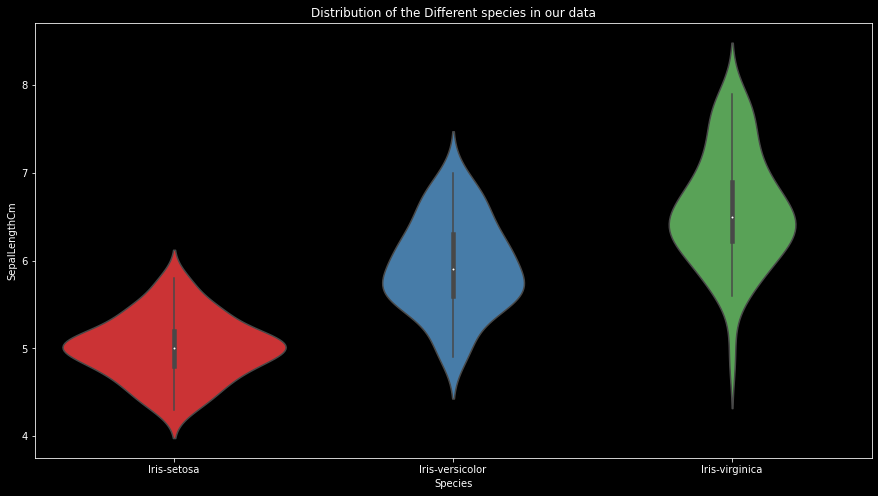

In [7]:
plt.style.use('dark_background') 
plt.figure(figsize = (15,8))
sns.violinplot(x='Species',y='SepalLengthCm',data=df,palette = 'Set1')
plt.title('Distribution of the Different species in our data')
plt.show()

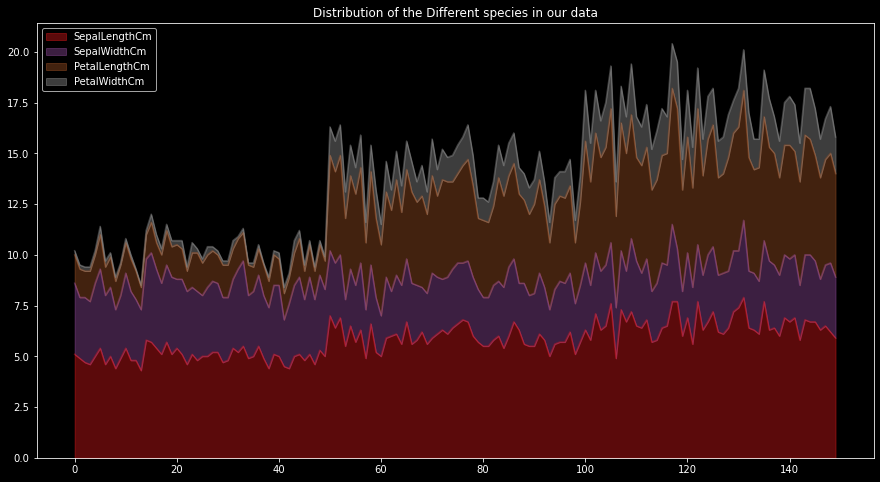

In [8]:
plt.style.use('dark_background') 
df.plot.area(y=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],alpha=0.4,cmap = 'Set1',figsize = (15,8))
plt.title('Distribution of the Different species in our data')
plt.show()

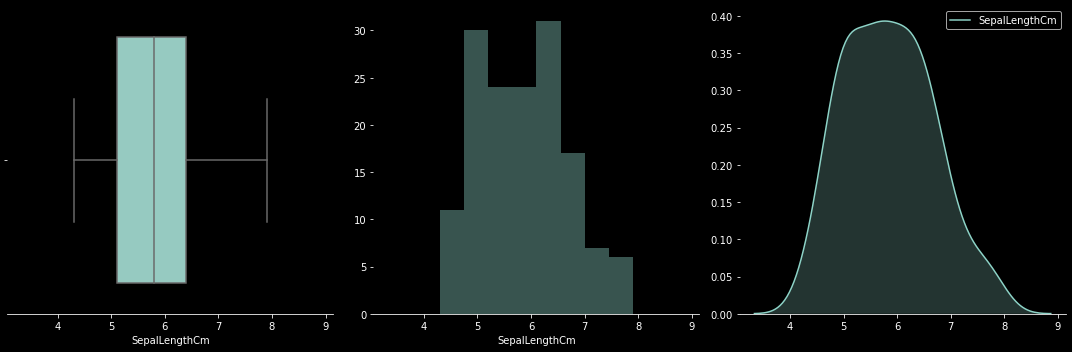

In [9]:
f, axes = plt.subplots(ncols = 3, figsize=(15, 5), sharex=True)
sns.despine(left=True)
sns.boxplot(x = df['SepalLengthCm'], ax=axes[0])
sns.distplot(a=df['SepalLengthCm'], kde=False, ax=axes[1])
sns.kdeplot(data=df['SepalLengthCm'], shade=True, ax=axes[2])
plt.tight_layout()

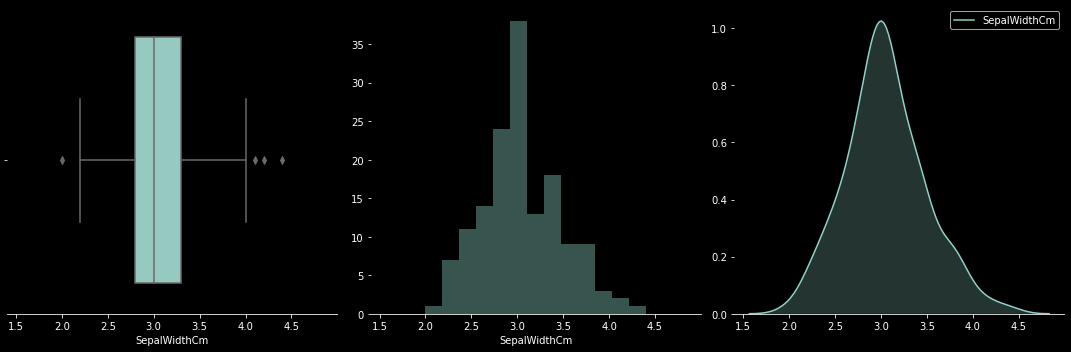

In [10]:
f, axes = plt.subplots(ncols = 3, figsize=(15, 5), sharex=True)
sns.despine(left=True)
sns.boxplot(x = df['SepalWidthCm'], ax=axes[0])
sns.distplot(a=df['SepalWidthCm'], kde=False, ax=axes[1])
sns.kdeplot(data=df['SepalWidthCm'], shade=True, ax=axes[2])
plt.tight_layout()

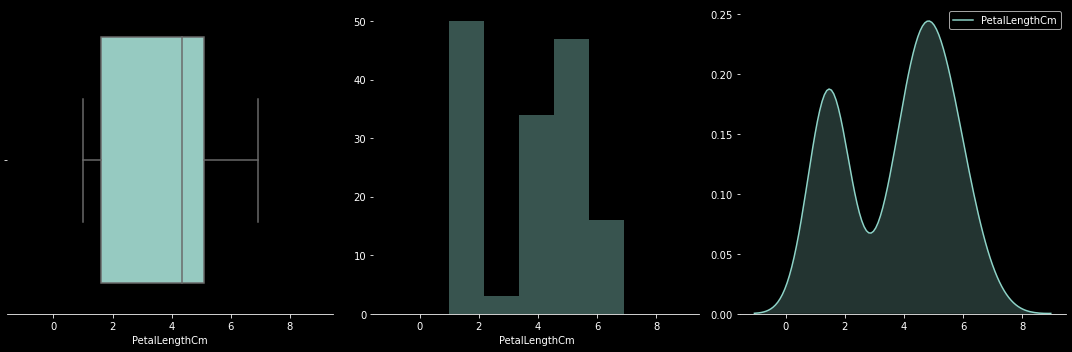

In [11]:
f, axes = plt.subplots(ncols = 3, figsize=(15, 5), sharex=True)
sns.despine(left=True)
sns.boxplot(x = df['PetalLengthCm'], ax=axes[0])
sns.distplot(a=df['PetalLengthCm'], kde=False, ax=axes[1])
sns.kdeplot(data=df['PetalLengthCm'], shade=True, ax=axes[2])
plt.tight_layout()

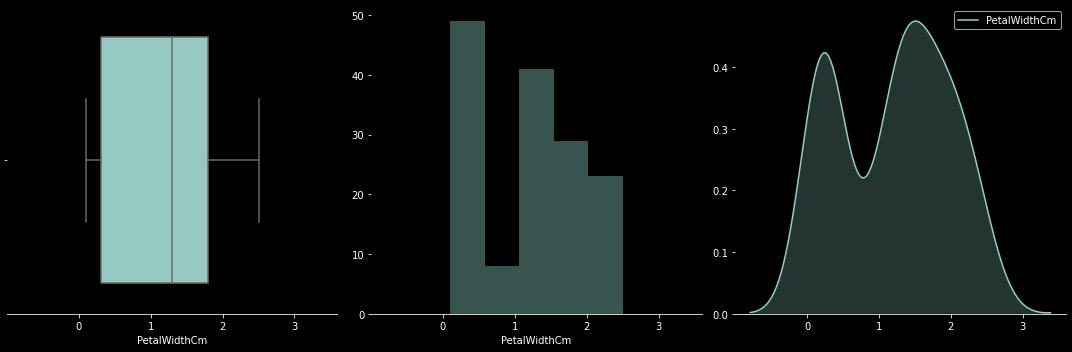

In [12]:
f, axes = plt.subplots(ncols = 3, figsize=(15, 5), sharex=True)
sns.despine(left=True)
sns.boxplot(x = df['PetalWidthCm'], ax=axes[0])
sns.distplot(a=df['PetalWidthCm'], kde=False, ax=axes[1])
sns.kdeplot(data=df['PetalWidthCm'], shade=True, ax=axes[2])
plt.tight_layout()

In [13]:
X_train,X_val,y_train,y_val=train_test_split(df.iloc[:,1:-1],df.iloc[:,-1],test_size=0.1,random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(135, 4)
(135,)
(15, 4)
(15,)


In [14]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_val)

In [15]:
print(accuracy_score(y_pred,y_val))

0.9333333333333333


In [16]:
print(classification_report(y_pred,y_val))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.50      0.67         2
 Iris-virginica       0.75      1.00      0.86         3

       accuracy                           0.93        15
      macro avg       0.92      0.83      0.84        15
   weighted avg       0.95      0.93      0.93        15



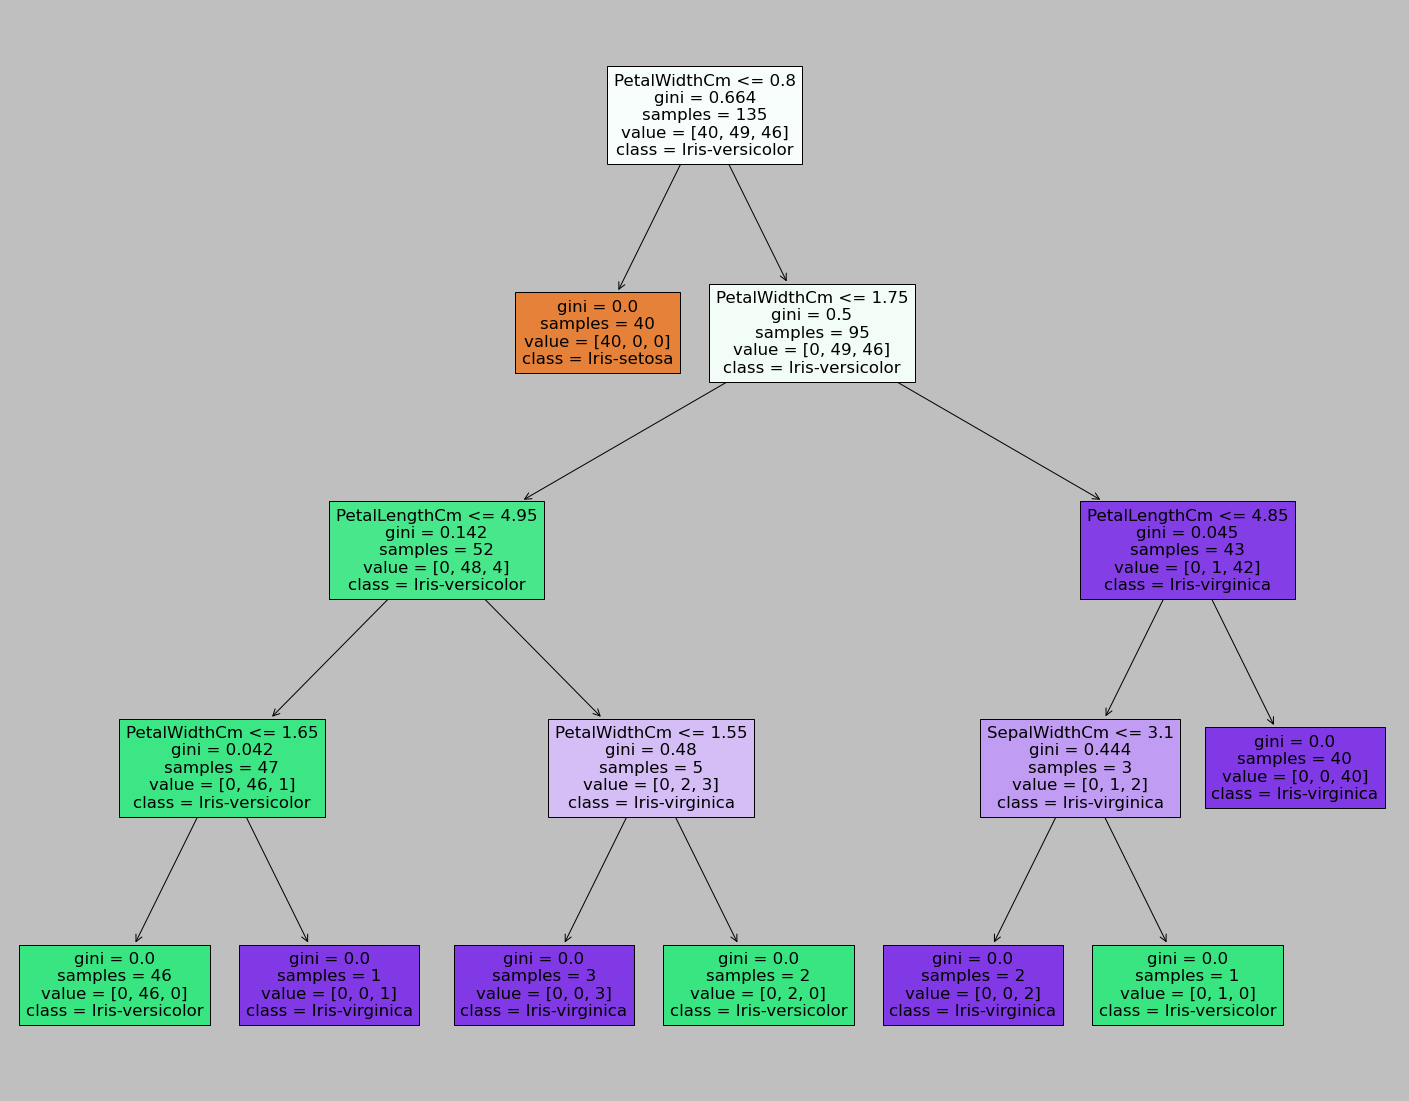

In [17]:
plt.style.use('grayscale')
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, #color="Infestation_Stage",
                   feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                   class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],
                   filled=True)